In [23]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

## Exploracion de Datos

In [2]:
df = pd.read_csv('VirusSample.csv') 

In [3]:
df.sample(n=5).head()

,file,api,class
9333,77efa9f801039186ce4999950b61839c70b56a81,"GetProcAddress,GetModuleHandleA,LoadLibraryA,G...",Worms
9364,66a7cc1523444f6d3f8f50ed1be659c92a1b71ff0f96fa...,"GetCursor,SendMessageTimeoutW,SHGetSpecialFold...",Virus
4505,d629f863bbb2398407c01f69cc53615244e3bd72,"LCMapStringA,LoadLibraryA,GetProcAddress,FreeL...",Trojan
4680,a5417a7485e4474aebd200ed399e3283425bf420,"LoadLibraryA,GetProcAddress,VirtualProtect,Vir...",Trojan
9062,6341281901a9887a7a342341460919afb99c20cb,"TlsSetValue,TlsGetValue,LocalAlloc,GetModuleHa...",Worms


In [4]:
df["class"].unique()

array(['Virus', 'Riskware', 'Spyware', 'Downloader', 'Dropper', 'Agent',
       'Adware', 'Trojan', 'Backdoor', 'Worms', 'Ransomware', 'Keylogger',
       'Crypt'], dtype=object)

In [5]:
print('Virus:', len(df[df['class']=='Virus']))
print('Riskware:', len(df[df['class']=='Riskware']))
print('Spyware:', len(df[df['class']=='Spyware']))
print('Downloader:', len(df[df['class']=='Downloader']))
print('Dropper:', len(df[df['class']=='Dropper']))
print('Agent:', len(df[df['class']=='Agent']))
print('Adware:', len(df[df['class']=='Adware']))
print('Trojan:', len(df[df['class']=='Trojan']))
print('Backdoor:', len(df[df['class']=='Backdoor']))
print('Worms:', len(df[df['class']=='Worms']))
print('Ransomware:', len(df[df['class']=='Ransomware']))
print('Keylogger:', len(df[df['class']=='Keylogger']))
print('Crypt:', len(df[df['class']=='Crypt']))

Virus: 2367
Riskware: 4
Spyware: 11
Downloader: 31
Dropper: 4
Agent: 102
Adware: 222
Trojan: 6153
Backdoor: 447
Worms: 441
Ransomware: 10
Keylogger: 1
Crypt: 2


<AxesSubplot:xlabel='class', ylabel='count'>

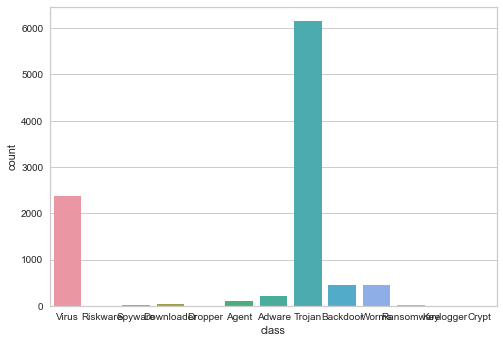

In [6]:
sns.countplot(x=df['class'], data=df)

## Preprocesamiento

In [7]:
newClasses = ['Virus', 'Agent', 'Adware', 'Trojan', 'Backdoor', 'Worms','Downloader']
df = df.loc[df["class"].isin(newClasses)]

In [8]:
df2 = df.copy()

In [9]:
df2["api"].apply(lambda x: ' '.join(x.split(",")))
df2

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus
...,...,...,...
9790,3b91b43ad8a25a8e9e52f938473f5bb05fb4d530ff4b22...,"NtResetWriteWatch,GetClipboardViewer,GetConsol...",Trojan
9791,54315d591d2855fc794ba5f61012efdd92b489576e4aa5...,"RtlpNtEnumerateSubKey,NtFlushWriteBuffer,ReadC...",Trojan
9792,dcb7507fa10537d2e3da2ea22ec6346e02a0926ad64d76...,"ZwNotifyChangeDirectoryFile,GetCursor,GetConso...",Trojan
9793,cf441d0a2de25c6207fc782e190ce5302171d5e28ce41b...,"ILSaveToStream,OleQueryLinkFromData,VarUdateFr...",Trojan


In [10]:
clf = RandomForestClassifier(max_depth=12, random_state=42, n_estimators = 200)

In [11]:
y = df["class"]
x = df2[['file','api']]

In [12]:
tv = TfidfVectorizer(min_df=0.15, max_df=1., use_idf=True, ngram_range=(1,2))
tv_matrix = tv.fit_transform(df2["api"])
tv_matrix_array = tv_matrix.toarray()
vocabulary = tv.get_feature_names_out()
X = pd.DataFrame(tv_matrix_array, columns=vocabulary)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Random Forest

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)

In [15]:
predictions= clf.predict(X_test)

In [16]:
cv = KFold(n_splits=10)
cross_val_score(clf, X, y, cv=cv)

array([0.89355169, 0.85977482, 0.93858751, 0.72848361, 0.85655738,
       0.84631148, 0.85553279, 0.85860656, 0.83196721, 0.73258197])

In [17]:
confusionMatrix = confusion_matrix(y_test, predictions)

In [18]:
confusionMatrix

array([[  38,    0,    1,    0,   20,    4,    0],
       [   0,    6,    0,    0,   21,    2,    0],
       [   0,    0,  110,    0,   17,    0,    0],
       [   2,    0,    0,    2,    5,    0,    0],
       [   4,    1,    0,    0, 1597,  247,    3],
       [   1,    0,    0,    1,   35,  668,    1],
       [   4,    0,    0,    0,   35,   45,   59]], dtype=int64)

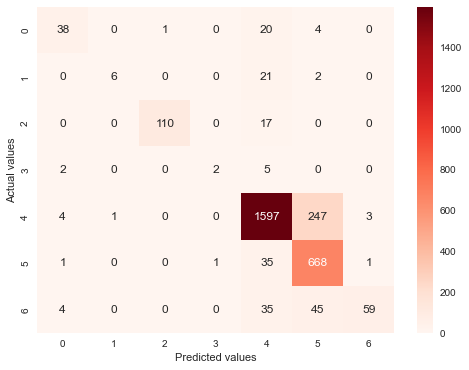

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(confusionMatrix,annot=True,cmap='Reds',fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [20]:
classification_report_result = classification_report(y_test,predictions)
print(classification_report_result)

              precision    recall  f1-score   support

      Adware       0.78      0.60      0.68        63
       Agent       0.86      0.21      0.33        29
    Backdoor       0.99      0.87      0.92       127
  Downloader       0.67      0.22      0.33         9
      Trojan       0.92      0.86      0.89      1852
       Virus       0.69      0.95      0.80       706
       Worms       0.94      0.41      0.57       143

    accuracy                           0.85      2929
   macro avg       0.83      0.59      0.65      2929
weighted avg       0.87      0.85      0.84      2929



## Explicacion de metricas obtenidas

precision: En este caso para cada categoria de malwares, se puede observar que la que mayor precision fue Backdoor con un 99%, Worms con un 94% y de igual forma Downloader y Virus fueron las que menor precision tuvieron, lo cual nos indica el porcentaje que el modelo logro predecir correctamente para cada categoria de malware. 

recall: Se puede observar que la categoria de Virus tuvo un mayor recall, siendo este de 95% en relacion a los datos reales, lo cual es bueno y de igual manera el que menor recall tuvo fue Agent, esto se puede deber a la poca cantidad de datos.

Acurracy: Se puede observar que el acurracy del modelo es de 85%, por lo que se puede asegurar que gran parte de las categorias de malware se clasifican correctamente.

## Support Vector Machines

In [25]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)

In [26]:
cv = KFold(n_splits=10)
cross_val_score(clf, X, y, cv=cv)

array([0.87205732, 0.84646878, 0.92630502, 0.63934426, 0.84118852,
       0.82684426, 0.84836066, 0.84938525, 0.83094262, 0.58606557])

In [27]:
confusionMatrix = confusion_matrix(y_test, predictions)

In [28]:
confusionMatrix

array([[  37,    0,    0,    0,   22,    4,    0],
       [   0,    0,    0,    0,   27,    2,    0],
       [   0,    0,  110,    0,   16,    0,    1],
       [   1,    0,    0,    0,    8,    0,    0],
       [   2,    0,    0,    0, 1599,  245,    6],
       [   4,    0,    0,    0,   41,  658,    3],
       [   4,    0,    0,    0,   57,   44,   38]], dtype=int64)

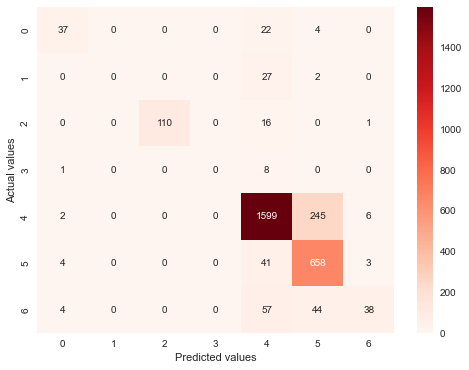

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(confusionMatrix,annot=True,cmap='Reds',fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [30]:
classification_report_result = classification_report(y_test,predictions)
print(classification_report_result)

              precision    recall  f1-score   support

      Adware       0.77      0.59      0.67        63
       Agent       0.00      0.00      0.00        29
    Backdoor       1.00      0.87      0.93       127
  Downloader       0.00      0.00      0.00         9
      Trojan       0.90      0.86      0.88      1852
       Virus       0.69      0.93      0.79       706
       Worms       0.79      0.27      0.40       143

    accuracy                           0.83      2929
   macro avg       0.59      0.50      0.52      2929
weighted avg       0.84      0.83      0.82      2929



C:\Users\joopa\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joopa\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joopa\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Explicacion de metricas obtenidas

precision: En este caso para cada categoria de malwares, se puede observar que la que mayor precision fue Backdoor con un 100%, Trojan con un 0.90% y de igual forma Agent y Virus fueron las que menor precision tuvieron, lo cual nos indica el porcentaje que el modelo logro predecir correctamente para cada categoria de malware. Hay que tomar en cuenta que para algunos casos la precision fue muy baja debido a la cantidad de datos, como lo es con Downloader.

recall: Se puede observar que la categoria de Virus tuvo un mayor recall, siendo este de 0.93 en relacion a los datos reales, lo cual es bueno y de igual manera el que menor recall tuvo fue Worms, esto se puede deber a la poca cantidad de datos.

Acurracy: Se puede observar que el acurracy del modelo es de 83%, por lo que se puede asegurar que gran parte de las categorias de malware se clasifican correctamente.

## Comparacion de Resultados

Al comparar los resultados con los del articulo, se puede observar que las metricas que se lograron obtener para el modelo de Random Forest y Support Vector Machines son bastantes buenas, ya que lograron predecir en su mayoria gran cantidad de las categorias de los malwares.